# Задание по программированию: Бэггинг и случайный лес

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Task 1

In [3]:
digits = load_digits()

In [57]:
print (dir(digits))
print ('\n',digits.data[0:30])
print ('\n',digits.target[0:30])

['DESCR', 'data', 'images', 'target', 'target_names']

 [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  0. ...  1.  0.  0.]
 [ 0.  0. 10. ...  1.  0.  0.]
 [ 0.  0.  9. ... 12. 11.  0.]]

 [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


Обозначаем за $X$ вектор признаков, а за $y$ - вектор ответов

In [59]:
X = digits.data
y = digits.target

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

DF = DecisionTreeClassifier()

In [61]:
cross_DF = cross_val_score(DF, X, y, cv = 10)
cross_DF_mean = cross_DF.mean()
print (cross_DF_mean)

0.8269926136903294


In [10]:
def write_answer_1(cross_DF_mean):
    with open("D:\Coursera\DF_answer_1.txt", "w") as file:
        file.write(str(cross_DF_mean))

In [11]:
write_answer_1(cross_DF_mean)

## Task 2

In [12]:
from sklearn.ensemble import BaggingClassifier

In [13]:
%%time
DF_BC = BaggingClassifier(base_estimator = DF, n_estimators = 100)
cross_DF_BC = cross_val_score(DF_BC, X, y, cv = 10)

Wall time: 15 s


In [14]:
cross_DF_BC_mean = cross_DF_BC.mean()

In [15]:
print (cross_DF_BC_mean)

0.9260838078399496


In [16]:
def write_answer_2(cross_DF_BC_mean):
    with open("D:\Coursera\DF_answer_2.txt", "w") as file:
        file.write(str(cross_DF_BC_mean))

In [17]:
write_answer_2(cross_DF_BC_mean)

## Task 3

In [41]:
%%time
DF_BC_new = BaggingClassifier(base_estimator = DF, max_features = int(np.sqrt(X.shape[1])), n_estimators = 100)
cross_DF_BC_new = cross_val_score(DF_BC_new, X, y, cv = 10)

Wall time: 3.78 s


In [42]:
cross_DF_BC_new_mean = cross_DF_BC_new.mean()
print (cross_DF_BC_new_mean)

0.9348323672792024


В рекомендациях было указано, что нужно несколько раз рассчитать cross_val_score, 
если анализатор не будет принимать ответы. В моём случае именно это и произошло, поэтому ниже
приводится цикл, в котором несколько рас рассчитываю cross_val_score и беру среднее значение

In [43]:
Answers = []
for _ in range(10):
    DF_BC_new = BaggingClassifier(base_estimator = DF, max_features = int(np.sqrt(X.shape[1])), n_estimators = 100)
    cross_DF_BC_new = cross_val_score(DF_BC_new, X, y, cv = 10)
    Answers.append(cross_DF_BC_new.mean())

In [48]:
mean = sum(Answers)/len(Answers)

0.9326272825907443

In [49]:
def write_answer_3(mean):
    with open("D:\Coursera\DF_answer_3.txt", "w") as file:
        file.write(str(mean))

In [50]:
write_answer_3(cross_DF_BC_new_mean)

## Task 4

In [22]:
DF_new_2 = DecisionTreeClassifier(max_features = int(np.sqrt(X.shape[1])))

In [23]:
%%time
DF_BC_new_2 = BaggingClassifier(base_estimator = DF_new_2, n_estimators = 100)
cross_DF_BC_new_2 = cross_val_score(DF_BC_new_2, X, y, cv = 10)

Wall time: 4.28 s


In [24]:
cross_DF_BC_new_2_mean = cross_DF_BC_new_2.mean()
print (cross_DF_BC_new_2_mean)

0.9544565836342385


In [25]:
def write_answer_4(cross_DF_BC_new_2_mean):
    with open("D:\Coursera\DF_answer_4.txt", "w") as file:
        file.write(str(cross_DF_BC_new_2_mean))

In [26]:
write_answer_4(cross_DF_BC_new_2_mean)

## Task 5

In [27]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

In [28]:
cross_RF = cross_val_score(RF, X, y, cv = 10)

In [29]:
print (cross_RF.mean())

0.927182506987311


In [30]:
cross_score = []
n_estimators = np.arange(5, 500, 30)
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators = i)
    cross_RF = cross_val_score(RF, X, y , cv = 10)
    cross_score.append(cross_RF.mean())

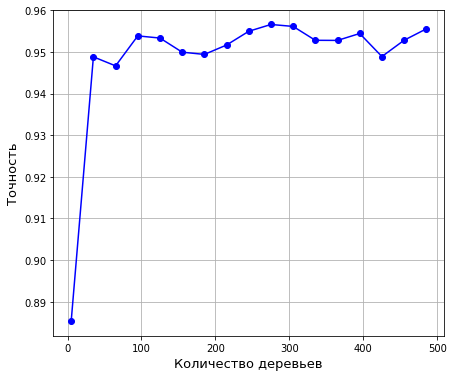

In [53]:
plt.figure(figsize = (7,6))
plt.plot(n_estimators, cross_score, color = 'blue', marker = 'o')
plt.xlabel('Количество деревьев', fontsize = 13)
plt.ylabel('Точность', fontsize = 13)
plt.grid(True)

In [32]:
cross_score_2 = []
max_features = np.arange(1, X.shape[1] + 1, 5)
for i in max_features:
    DF_2 = DecisionTreeClassifier(max_features = i)
    DF_2 = BaggingClassifier(base_estimator = DF_2, n_estimators = 100)
    cross_DF_2 = cross_val_score(DF_2, X,y, cv = 10)
    cross_score_2.append(cross_DF_2.mean())

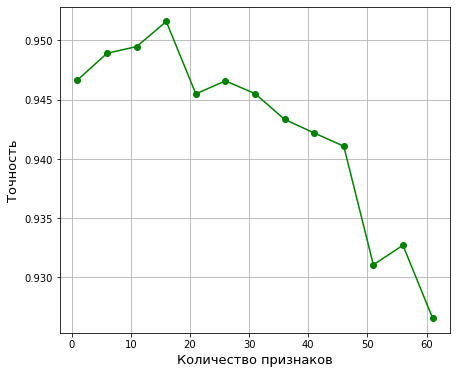

In [33]:
plt.figure(figsize = (7,6))
plt.plot(max_features, cross_score_2, color = 'green', marker = 'o')
plt.xlabel('Количество признаков', fontsize = 13)
plt.ylabel('Точность', fontsize = 13)
plt.grid(True)
#При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, 
#чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, 
#тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), 
#и тем лучше работает их композиция.

In [34]:
cross_score_3 = []
max_depth = np.arange(2, 20, 2)
for i in max_depth:
    DF_3 = DecisionTreeClassifier(max_depth = i)
    DF_3 = BaggingClassifier(base_estimator = DF_3, n_estimators = 100)
    cross_DF_3 = cross_val_score(DF_3, X,y, cv = 10)
    cross_score_3.append(cross_DF_3.mean())

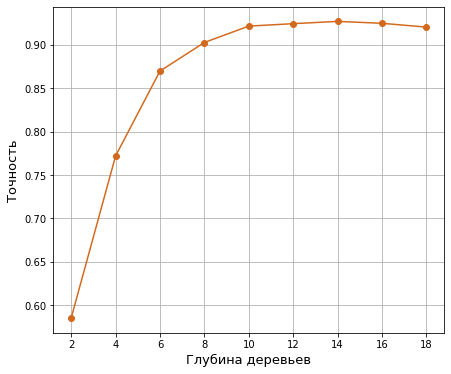

In [35]:
plt.figure(figsize = (7,6))
plt.plot(max_depth, cross_score_3, color = 'chocolate', marker = 'o')
plt.xlabel('Глубина деревьев', fontsize = 13)
plt.ylabel('Точность', fontsize = 13)
plt.grid(True)
#При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, 
#чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, 
#а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их 
#переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, 
#и при усреднении они компенсируют переобученность друг-друга)

In [36]:
answers = [2,3,4,7]

In [37]:
def write_answer_5(answers):
    with open("D:\Coursera\DF_answer_5.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in answers]))

In [38]:
write_answer_5(answers)